In [2]:
import pandas as pd
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


raw_data = pd.read_csv('solubility_dataset.csv')
# 1. Inspect the Coloumn Names
print(raw_data.columns.values.tolist())

# 2. Size of a DataFrame
print(raw_data.shape)



['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD', 'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ', 'BertzCT']
(9982, 26)


In [3]:
# Task 3) Basic Stats
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
from etc.my_functions import compute_covariance

# Grab the Solubility Column
solubility_data = raw_data['Solubility']
molwt_data = raw_data['MolWt']

# Compute covariance between Solubility and MolWt
covariance = solubility_data.cov(molwt_data) # uses 1/(N-1)
print(f"Covariance between Solubility and MolWt computed with pandas: {covariance}")

covariance_manual = compute_covariance(solubility_data, molwt_data, normalize=False)
print(f"Covariance between Solubility and MolWt computed manually: {covariance_manual}")

covariance_manual_normalized = compute_covariance(solubility_data, molwt_data, normalize=True)
print(f"Covariance between Solubility and MolWt computed manually normalized: {covariance_manual_normalized}")

# Create all molecular structures
molecules = [Chem.MolFromSmiles(smiles) for smiles in raw_data['SMILES']]
n_atoms = [mol.GetNumAtoms() for mol in molecules]
n_heavy_atoms = raw_data['HeavyAtomCount']

# compute the covariance between the number of all atoms and the number of heavy atoms
covariance_n_atoms = compute_covariance(n_atoms, n_heavy_atoms, normalize=False)
print(f"Covariance between the number of all atoms and the number of heavy atoms: {covariance_n_atoms}")
covariance_n_atoms_normalized = compute_covariance(n_atoms, n_heavy_atoms, normalize=True)
print(f"Covariance between the number of all atoms and the number of heavy atoms normalized: {covariance_n_atoms_normalized}")


Covariance between Solubility and MolWt computed with pandas: -160.52228817864784
Covariance between Solubility and MolWt computed manually: -160.50620700371505
Covariance between Solubility and MolWt computed manually normalized: -0.36803163616888135


[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not removing hydrogen atom without neighbors
[10:21:16] WARNING: not r

Covariance between the number of all atoms and the number of heavy atoms: 149.828790741387
Covariance between the number of all atoms and the number of heavy atoms normalized: 0.9999713966577772


In [4]:
# Task 4) Getting the Index of a Value

weights = raw_data['MolWt']
ring_counts = raw_data['RingCount']
num_valence_electrons = raw_data['NumValenceElectrons']


# find the maximum molecular weight and return the index of the molecule
max_idx = weights.idxmax()
print(f"The maximal weight is {weights.max()} and the index of the molecule is {max_idx}")

# find the number of rings in the molecule with the maximum molecular weight
max_ring_count = ring_counts.loc[max_idx]
print(f"The number of rings in the molecule with the maximum molecular weight is {max_ring_count}")

# find the InChiKey of the molecule with the fewest number of valence electrons
min_idx = num_valence_electrons.idxmin()
print(f"The minimal number of valence electrons is {num_valence_electrons.min()} and the index of the molecule is {min_idx}")

min_val_elec_inchikey = raw_data.loc[min_idx, 'InChIKey']
print(f"The InChIKey of the molecule with the fewest number of valence electrons is {min_val_elec_inchikey}")




The maximal weight is 5299.456 and the index of the molecule is 1523
The number of rings in the molecule with the maximum molecular weight is 36.0
The minimal number of valence electrons is 0.0 and the index of the molecule is 143
The InChIKey of the molecule with the fewest number of valence electrons is JLVVSXFLKOJNIY-UHFFFAOYSA-N


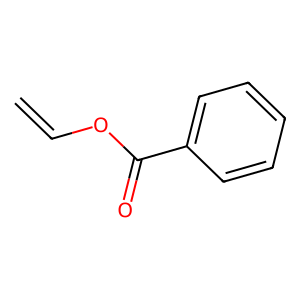

In [5]:
# Task 5) Display Lewis Structure of the 56th Molecule
mol_in_question = molecules[55]
Draw.MolToFile(mol_in_question, 'mol_in_question.png')
Draw.MolToImage(mol_in_question)


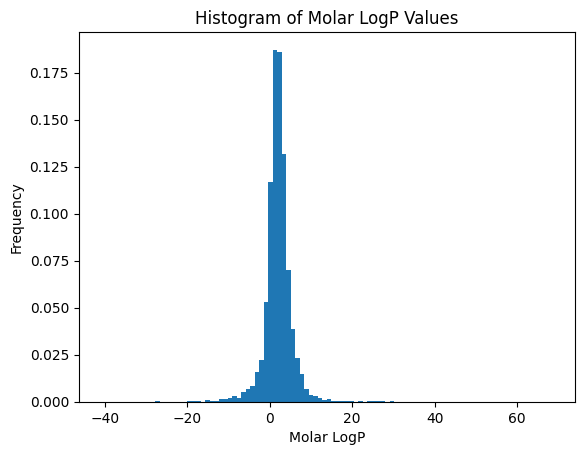

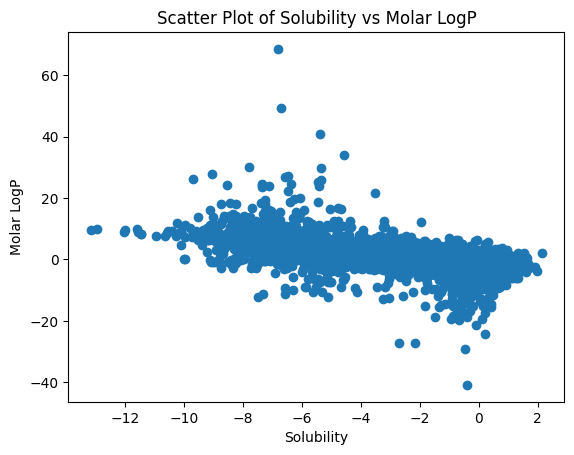

In [13]:
# Task 6) Plotting
import matplotlib.pyplot as plt

mol_log_p = raw_data["MolLogP"]

# create a histogram of the molar logP values
ax, fig = plt.subplots()
fig.hist(mol_log_p, bins=100, density=True)
fig.set_xlabel('Molar LogP')
fig.set_ylabel('Frequency')
fig.set_title('Histogram of Molar LogP Values')
plt.savefig('histogram_mol_log_p.png')

# create a scatter plot of the Solubility (x) and MolLogP (y)
ax, fig = plt.subplots()
fig.scatter(solubility_data, mol_log_p)
fig.set_xlabel('Solubility')
fig.set_ylabel('Molar LogP')

fig.set_title('Scatter Plot of Solubility vs Molar LogP')
plt.savefig('scatter_plot_solubility_mol_log_p.png')



In [7]:
# Task 7) Searching Strings

# Find the number of molecules containing atleast on zink ion/atom
smiles_data = raw_data['SMILES']
zn_mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_data if 'Zn' in smiles]
print(f"The number of molecules containing atleast on zink ion/atom is {len(zn_mols)}")

The number of molecules containing atleast on zink ion/atom is 44
